In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas as gp

In [3]:
data_derived_df = pd.read_csv('data_derived_v2.csv').iloc[:,1:]


/Users/pavankumarboinapalli/DSWorkspace/ProgramFiles/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
population_df = pd.read_csv("population_df.csv").iloc[:,1:]

In [5]:
population_df.columns

Index(['Borough', 'census_decade', 'population'], dtype='object')

In [6]:
data_df = pd.merge(data_derived_df,population_df,how="left",left_on=["BOROUGH","Issuance_Date_Decade"],right_on=["Borough","census_decade"])

In [7]:
data_df.shape

(3488235, 76)

In [8]:
data_derived_df.shape

(3488235, 73)

In [9]:
data_df.columns.T

Index(['BOROUGH', 'Bin_No', 'House_No', 'Street_Name', 'Job_No', 'Job_doc_No',
       'Job_Type', 'Self_Cert', 'Block', 'Lot', 'Community_Board', 'Zip_Code',
       'Bldg_Type', 'Residential', 'Work_Type', 'Permit_Status',
       'Filing_Status', 'Permit_Type', 'Permit_Sequence_No', 'Permit_Subtype',
       'Site_Fill', 'Filing_Date', 'Issuance_Date', 'Expiration_Date',
       'Job_Start_Date', 'Permittees_First_Name', 'Permittees_Last_Name',
       'Permittees_Business_Name', 'Permittees_Phone_No',
       'Permittees_License_Type', 'Permittees_License_No',
       'Act_as_Superintendent', 'Superintendent_First_&_Last_Name',
       'Superintendent_Business_Name', 'Owners_Business_Type', 'Non-Profit',
       'Owners_Business_Name', 'Owners_First_Name', 'Owners_Last_Name',
       'Owners_House_No', 'Owners_House_Street_Name', 'Owners_House_City',
       'Owners_House_State', 'Owners_House_Zip_Code', 'Owners_Phone_No',
       'DOBRunDate', 'PERMIT_SI_NO', 'LATITUDE', 'LONGITUDE',
       'C

##  Filing Status vs Permit Status

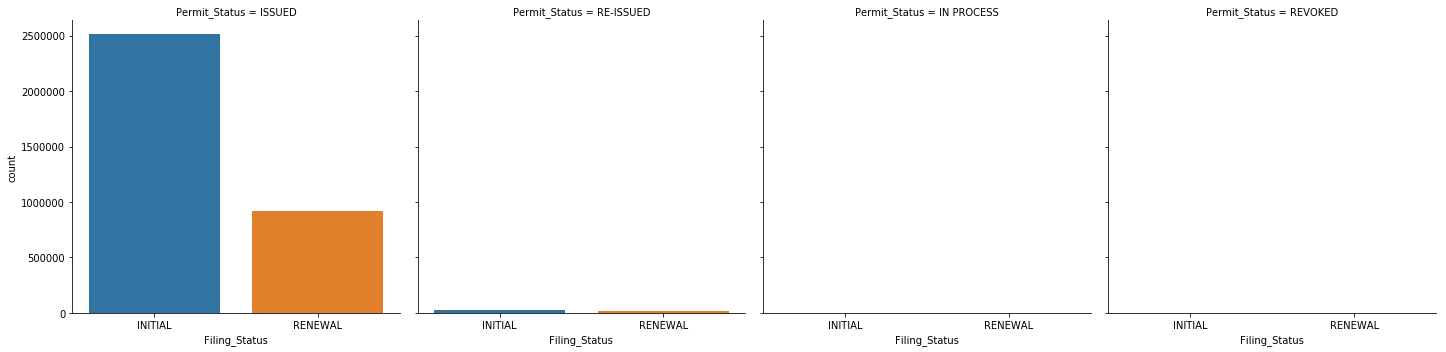

In [11]:
sns.catplot('Filing_Status',col='Permit_Status',kind='count',data=data_df)

###### Most of the permit's status is "Issued" and very few are reissued and revoked. Among the issued permits, "Renewal" permits account to 30%

## Reissued permits vs Permit type

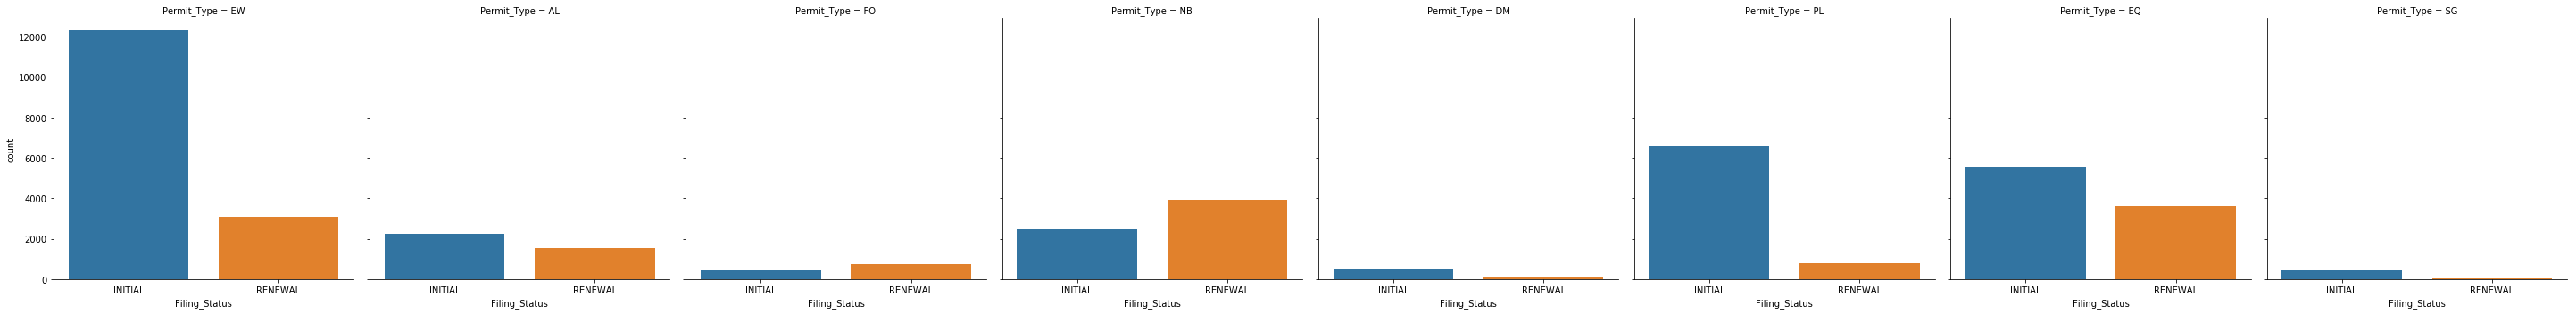

In [12]:
sns.catplot('Filing_Status',col='Permit_Type',kind='count',data=data_df.loc[data_df['Permit_Status']=="RE-ISSUED",:])

##  Self Certification vs Permit Status

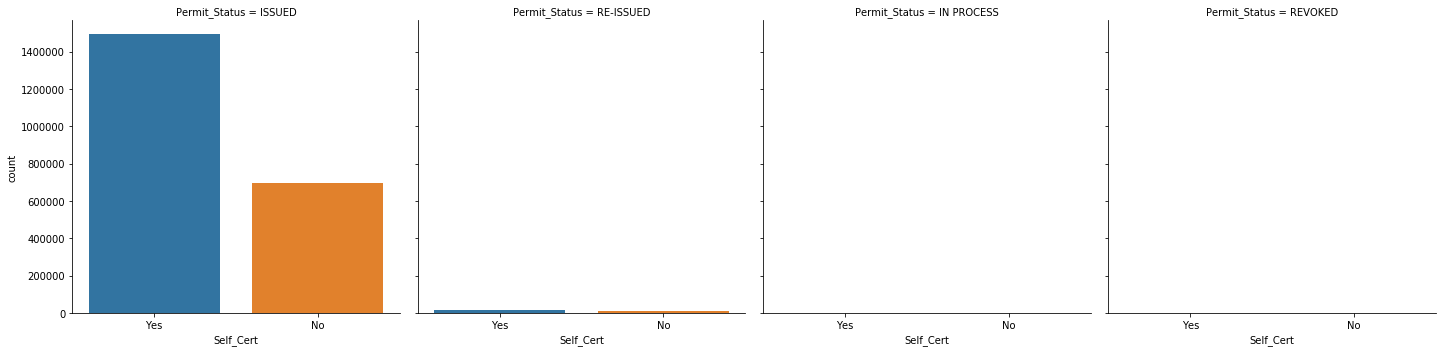

In [13]:
sns.catplot('Self_Cert',col='Permit_Status',kind='count',data=data_df)

###### Most of the permits are self certified and Self certified permits account for 65% of the ISSued permits

## Filing Status vs Permit Type

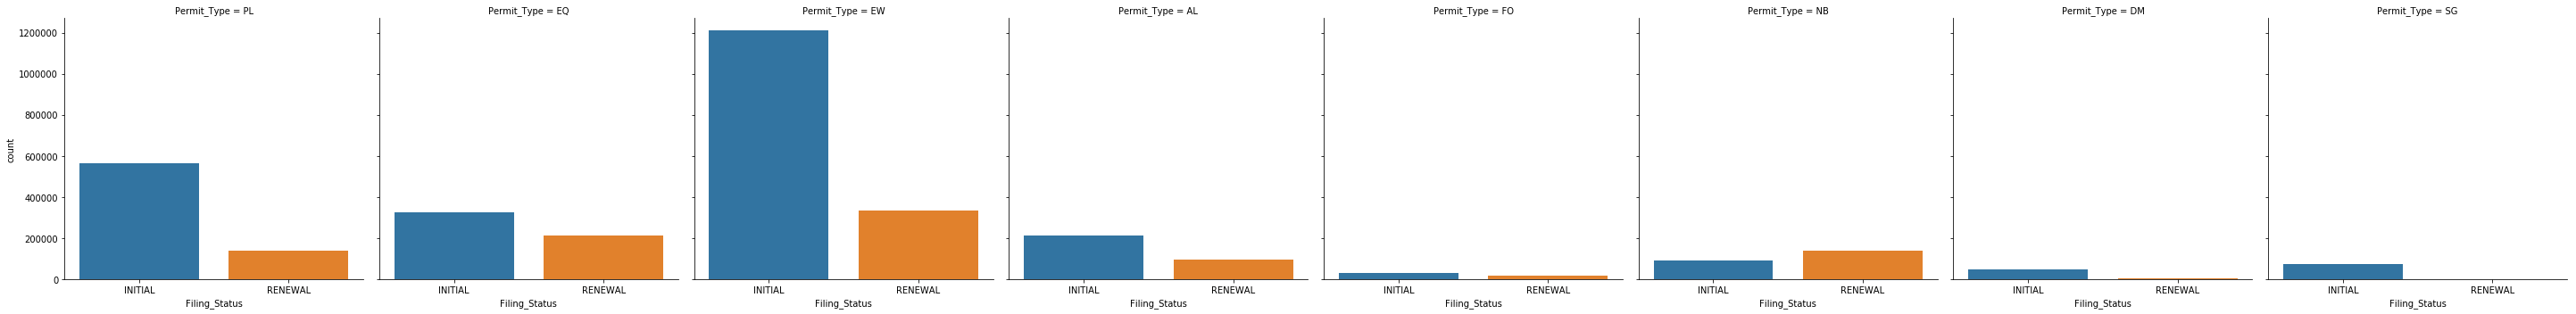

In [14]:
sns.catplot('Filing_Status',col='Permit_Type',kind='count',data=data_df)

#### For new building permits  renewal filing statuses exceed Initial filing statuses and For other work permits, Initial filing statuses exceed Renewal filing statuses

## Permit Type vs Bulding Type

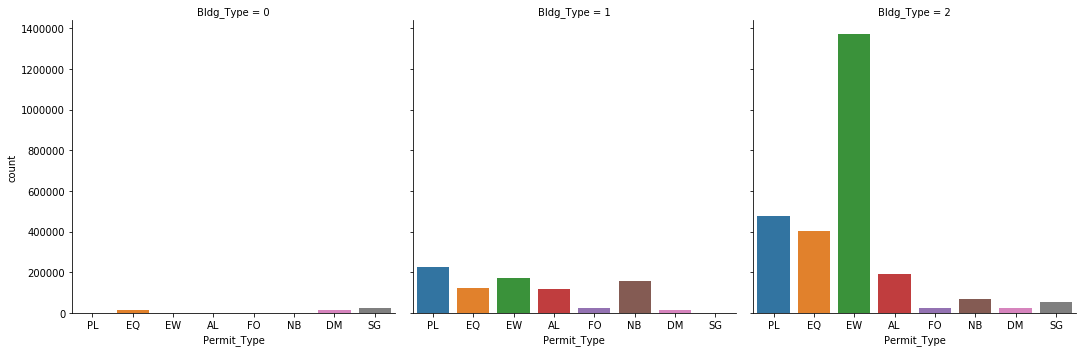

In [15]:
sns.catplot('Permit_Type',col='Bldg_Type',kind='count',data=data_df)

###### For building type 1, Plumbing work permits are highest and for Building Type 1, Equipment type work permits are highest for Building Type 2

In [16]:
s = data_df[["BOROUGH","Permit_Type"]].groupby(by=["BOROUGH","Permit_Type"]).size().reset_index()

In [17]:
s=s.pivot(index='BOROUGH',columns="Permit_Type")

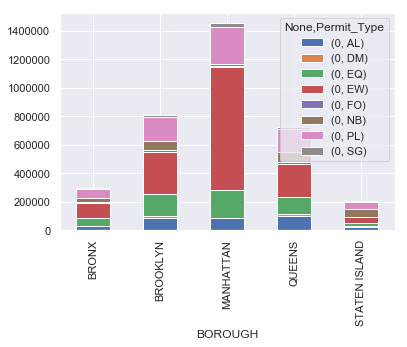

In [18]:
sns.set()
s.plot(kind='bar', stacked=True)

## Residential vs Building Type

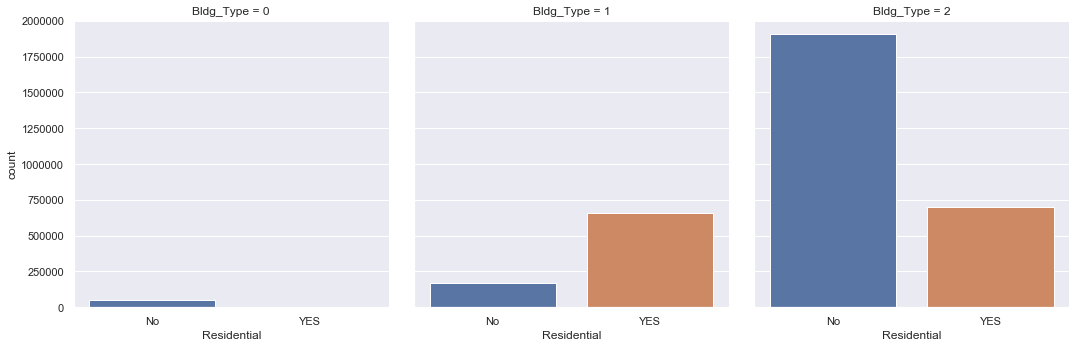

In [19]:
sns.catplot('Residential',col='Bldg_Type',kind='count',data=data_df)

###### This confirms that Building Type 1 is Residential building type and Building Type 2 is commercial Type

## Work Type vs Building Type

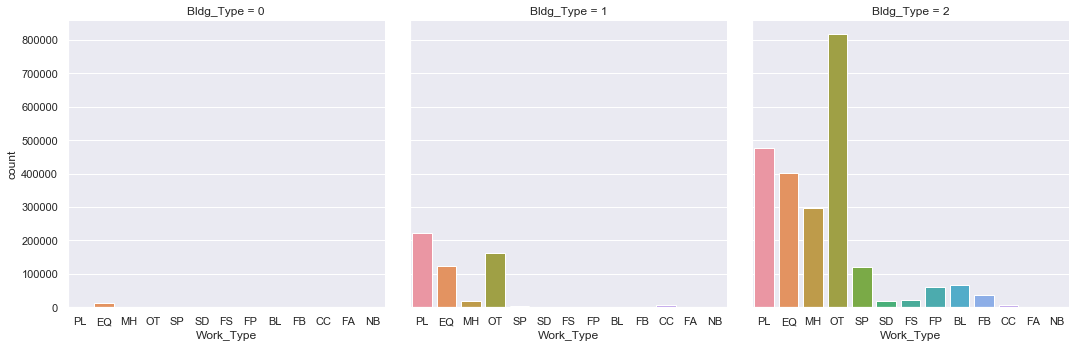

In [20]:
sns.catplot('Work_Type',col='Bldg_Type',kind='count',data=data_df)

###### This suggests same hypothesis that Plumbing work is highest in Building Type 1 (Residential) and Other work is highest in Commercial(Type 2) Buildings

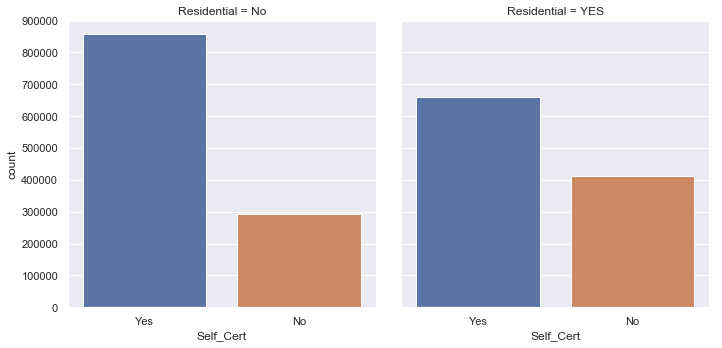

In [21]:
sns.catplot('Self_Cert',col='Residential',kind='count',data=data_df)

In [1]:
sns.catplot('Residential',col='Bldg_Type',kind='count',data=data_df)

NameError: name 'sns' is not defined

## Permit Type vs Residential

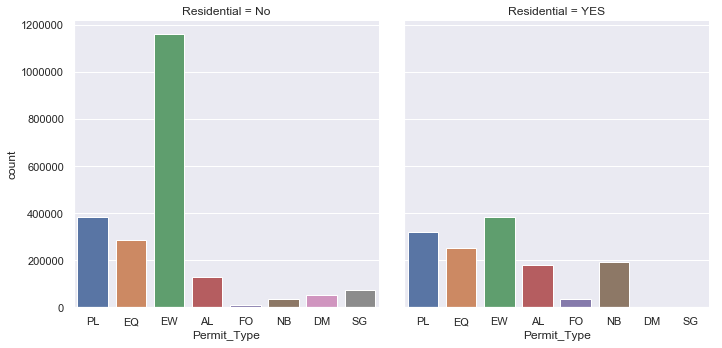

In [22]:
sns.catplot('Permit_Type',col='Residential',kind='count',data=data_df)

###### We can observe that Demolition Permit Ratio is much lesser for Residential buildings and New Building Permit Ratio is higher for Residential Buildings.

###### We can observe that Equipment Permit Ratio is higher for commercial Buildings

## Residential vs Commercial Permits Issued Across Years

In [23]:
resid_plot = data_df.groupby(by=["Issuance_Date_Year","Residential"]).size().reset_index().rename(columns={0:'Count'})

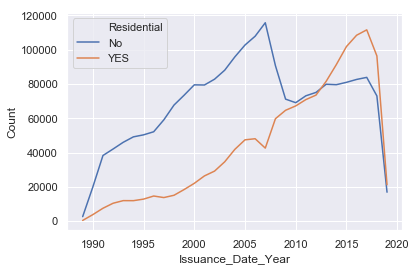

In [24]:
sns.lineplot(x="Issuance_Date_Year",y="Count",hue="Residential",data=resid_plot)

## Residential vs Bourough vs Year

In [25]:
resid_bor_plot = data_df.groupby(by=["Issuance_Date_Year","BOROUGH","Residential"]).size().reset_index().rename(columns={0:'Count'})

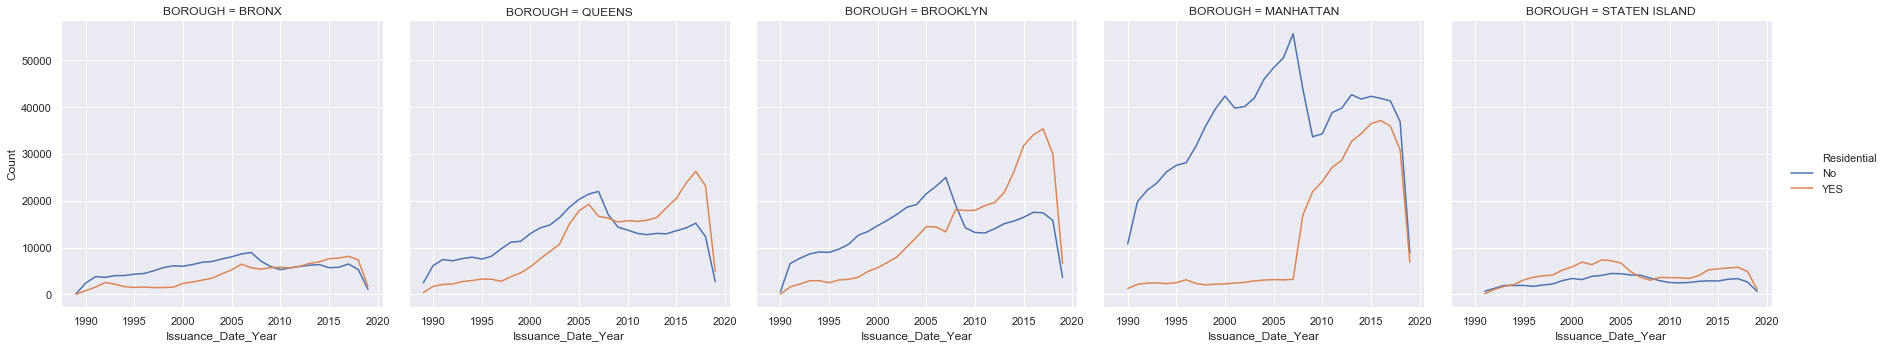

In [26]:
sns.relplot(x="Issuance_Date_Year",y="Count",kind="line",col="BOROUGH",hue="Residential",data=resid_bor_plot)

In [30]:
resid_bor_plot = data_df.groupby(by=["Issuance_Date_Year","BOROUGH","Permit_Type"]).size().reset_index().rename(columns={0:'Count'})

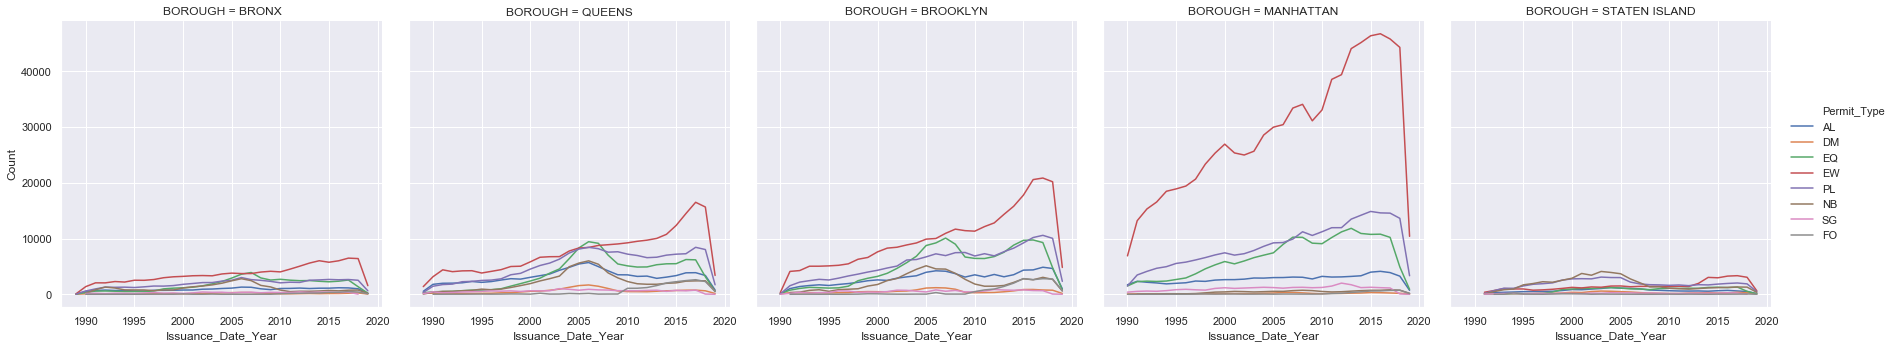

In [31]:
sns.relplot(x="Issuance_Date_Year",y="Count",kind="line",col="BOROUGH",hue="Permit_Type",data=resid_bor_plot)

In [34]:
resid_bor_plot = data_df.groupby(by=["Issuance_Date_Decade","BOROUGH","Residential"]).size().reset_index().rename(columns={0:'Count'})

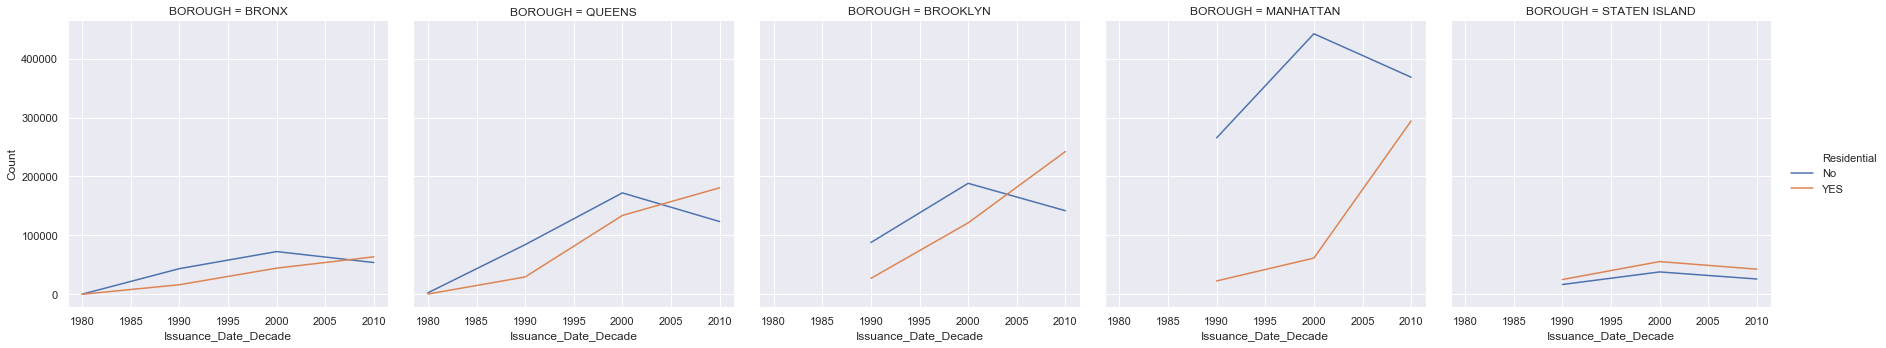

In [35]:
sns.relplot(x="Issuance_Date_Decade",y="Count",kind="line",col="BOROUGH",hue="Residential",data=resid_bor_plot)

In [29]:
# How Total Number of permits per permittype are varying in each borough over the years (borough as hue and DOBrun date as x axis)

# Bubble chart of owner's zipcode count accross the years (Advanced on geopandas)

# unique owners Zips per borough accross time( timeseries matplotlib)


# How many days does does it take for permit to be issued? Linear regression? Hypothesis testing based on plots?

# Get Adult Population data
# Get Average Income data## Work Type vs Building Type
